# Statistical Analysis 

Statistical analysis is the collection and interpretation of data in order to uncover patterns and trends. It is a component of data analytics. Statistical analysis can be used in situations like gathering research interpretations, statistical modeling or designing surveys and studies.

The analysis is based on 4 file ".txt" containing all the analysis data. 

In [3]:
# improt required libraraies
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from importlib import reload

In [4]:
# import data from the files
with open("collision.txt") as f:
    timestamp_s = f.read().splitlines() 
timestamp = list(map(float, timestamp_s))

with open("trajectory.txt") as f:
    collision_s = f.read().splitlines() 
collision = list(map(int, collision_s))

with open("collisionp.txt") as f:
    timestampp_s = f.read().splitlines() 
timestampp = list(map(float, timestampp_s))

with open("trajectoryp.txt") as f:
    collisionp_s = f.read().splitlines() 
collisionp = list(map(int, collisionp_s))

## Calculating average and standard deviation for analysis

In [5]:
# Calculating the average
collision_mean = np.mean(collision)
timestamp_mean = np.mean(timestamp)
collisionp_mean = np.mean(collisionp)
timestampp_mean = np.mean(timestampp)

# Calculating the standard deviation
collision_std = np.std(collision)
timestamp_std = np.std(timestamp)
collisionp_std = np.std(collisionp)
timestampp_std = np.std(timestampp)

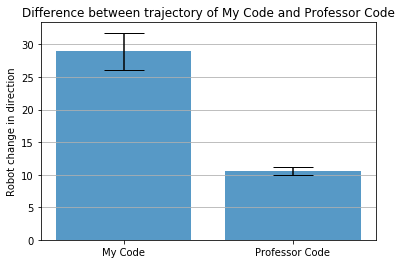

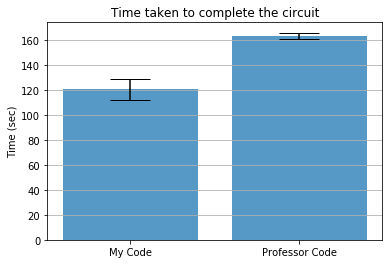

In [6]:
# Computing medium using standard deviation

# Define labels, positions, bar heights and error bar heights
labels = ['My Code', 'Professor Code']
x_pos1 = np.arange(len(labels))
CTEs1 = [collision_mean, collisionp_mean]
error1 = [collision_std, collisionp_std]

fig1, ax1 = plt.subplots()
ax1.bar(x_pos1, CTEs1,
       yerr=error1,
       align='center',
       alpha=0.75,
       ecolor='black',
       capsize=20)
ax1.set_ylabel('Robot change in direction')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(labels)
ax1.set_title('Difference between trajectory of My Code and Professor Code')
ax1.yaxis.grid(True)

labels2 = ['My Code', 'Professor Code']
x_pos2 = np.arange(len(labels))
CTEs2 = [timestamp_mean, timestampp_mean]
error2 = [timestamp_std, timestampp_std]

fig2, ax2 = plt.subplots()
ax2.bar(x_pos2, CTEs2,
       yerr=error2,
       align='center',
       alpha=0.75,
       ecolor='black',
       capsize=20)
ax2.set_ylabel('Time (sec)')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(labels2)
ax2.set_title('Time taken to complete the circuit')
ax2.yaxis.grid(True)

plt.show()

## Collision Test Graphical Representation

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


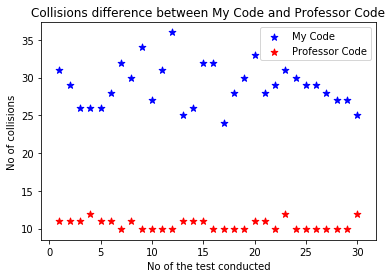

In [7]:
x=[]
for i in range(1,31):
    x.append(i)
print(x)

# plotting points as a scatter plot
plt.scatter(x, collision, label= "My Code", color= "blue",
            marker= "*", s=50)

plt.scatter(x, collisionp, label= "Professor Code", color= "red",
            marker= "*", s=50)
 
# x-axis label
plt.xlabel('No of the test conducted')
# frequency label
plt.ylabel('No of collisions')
# plot title
plt.title('Collisions difference between My Code and Professor Code')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()

## Time Taken Graphical Representation

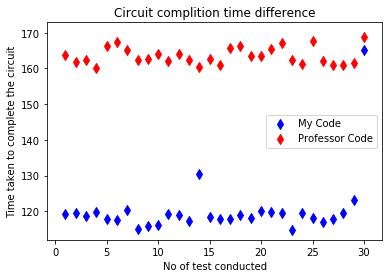

In [8]:
# plotting points as a scatter plot
plt.scatter(x, timestamp, label= "My Code", color= "blue",
            marker= "d", s=50)

plt.scatter(x, timestampp, label= "Professor Code", color= "red",
            marker= "d", s=50)
 
# x-axis label
plt.xlabel('No of test conducted')
# frequency label
plt.ylabel('Time taken to complete the circuit')
# plot title
plt.title('Circuit complition time difference')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()

## Graphing Representation of Time taken to complete the circuit and collision difference of both the two codes (my code & professor code)

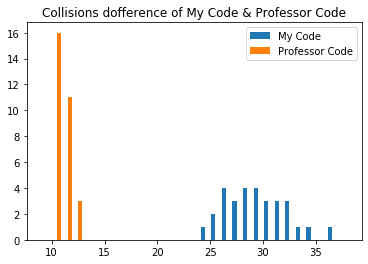

In [9]:
bins = np.linspace(9, 38, 30)
plt=reload(plt)
plt.hist([collision, collisionp], bins, label=['My Code', 'Professor Code'])
plt.title('Collisions dofference of My Code & Professor Code')
plt.legend(loc='upper right')
plt.show()

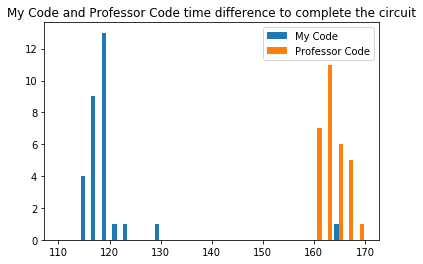

In [10]:
bins = np.linspace(110, 170, 30)
plt.hist([timestamp, timestampp], bins, label=['My Code', 'Professor Code'])
plt.title('My Code and Professor Code time difference to complete the circuit')
plt.legend(loc='upper right')
plt.show()

## T-Test Analysis

T-Test, also known as Student’s Test, is based on t-distribution and is considered an appropriate test for judging
the significance of a sample mean or for judging the significance of difference between the means of two
samples in case of small sample(s) when population variance is not known (in which case we use variance of the
sample as an estimate of the population variance). The relevant test statistic, t, is calculated from the sample
data and then compared with its probable value based on t-distribution at a specified level of significance for
concerning degrees of freedom for accepting or rejecting the null hypothesis (source from [Research Track II_Statistics](https://2021.aulaweb.unige.it/pluginfile.php/422414/mod_resource/content/0/04_Statistics.pdf)).

Here, two T-test analysis is performed between the two data and expected that they're going to be deeply different. This is a test for the null hypothesis that two independent samples have identical average values. This test assumes that the data have identical variances by default. This is to understand how different they are.

In [13]:
statistic_co, p_value = st.ttest_ind(a=collision, b=collisionp, equal_var=True)
print("Collision_Static = " + str(statistic_co))
print("p_Values = "+ str(p_value))

Collision_Static = 34.031085935665956
p_Values = 5.05537028942152e-40


In [14]:
statistic_co, p_value = st.ttest_ind(a=timestamp, b=timestampp, equal_var=True)
print("Collision_Static = " + str(statistic_co))
print("p_Values = "+ str(p_value))

Collision_Static = -25.589230325578303
p_Values = 2.750043113035198e-33
